# Project 3 - Part 1 - Chicago Crime Data

# Topics 2, 4, and 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 321
np.random.seed(SEED)
#display more columns
pd.set_option('display.max_columns',50)



In [2]:
!pip install holidays

In [3]:
import holidays
import datetime as dt
from holidays import country_holidays



In [4]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major 
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax



In [5]:

folder = "Data/Chicago/"
crime_files = sorted(glob.glob(folder+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])

In [6]:
#df = pd.read_csv('YOUR PATH',low_memory=False)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


ID                    Date     Primary Type          Description  \
0  1326041  01/01/2001 01:00:00 AM          BATTERY               SIMPLE   
1  1319931  01/01/2001 01:00:00 PM          BATTERY               SIMPLE   
2  1324743  01/01/2001 01:00:00 PM         GAMBLING  ILLEGAL ILL LOTTERY   
3  1310717  01/01/2001 01:00:00 AM  CRIMINAL DAMAGE           TO VEHICLE   
4  1318099  01/01/2001 01:00:00 AM          BATTERY               SIMPLE   

      Location Description  Arrest  Domestic  Beat  District  Ward   Latitude  \
0                RESIDENCE   False     False  1624      16.0   NaN  41.957850   
1                RESIDENCE   False      True   825       8.0   NaN  41.783892   
2                   STREET    True     False   313       3.0   NaN  41.780412   
3                   STREET   False     False  2424      24.0   NaN  42.012391   
4  RESIDENCE PORCH/HALLWAY   False      True   214       2.0   NaN  41.819538   

   Longitude  
0 -87.749185  
1 -87.684841  
2 -87.611970  
3 -87.678032  
4 -87.620020

In [7]:
df['Date'] = pd.to_datetime(df['Date'])


In [8]:
# how many null values did we create?
df['Date'].isna().sum()



0

In [9]:
df_reg_index = df

In [10]:
## now that we remove NaT's let's make our datetime index
df = df.set_index('Date')
df.head(3)


ID Primary Type          Description  \
Date                                                             
2001-01-01 01:00:00  1326041      BATTERY               SIMPLE   
2001-01-01 13:00:00  1319931      BATTERY               SIMPLE   
2001-01-01 13:00:00  1324743     GAMBLING  ILLEGAL ILL LOTTERY   

                    Location Description  Arrest  Domestic  Beat  District  \
Date                                                                         
2001-01-01 01:00:00            RESIDENCE   False     False  1624      16.0   
2001-01-01 13:00:00            RESIDENCE   False      True   825       8.0   
2001-01-01 13:00:00               STREET    True     False   313       3.0   

                     Ward   Latitude  Longitude  
Date                                             
2001-01-01 01:00:00   NaN  41.957850 -87.749185  
2001-01-01 13:00:00   NaN  41.783892 -87.684841  
2001-01-01 13:00:00   NaN  41.780412 -87.611970

In [11]:
df = df.sort_index()
df.index


DatetimeIndex(['2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               ...
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:47:00',
               '2022-12-31 23:47:00', '2022-12-31 23:50:00',
               '2022-12-31 23:50:00', '2022-12-31 23:55:00'],
              dtype='datetime64[ns]', name='Date', length=7713109, freq=None)

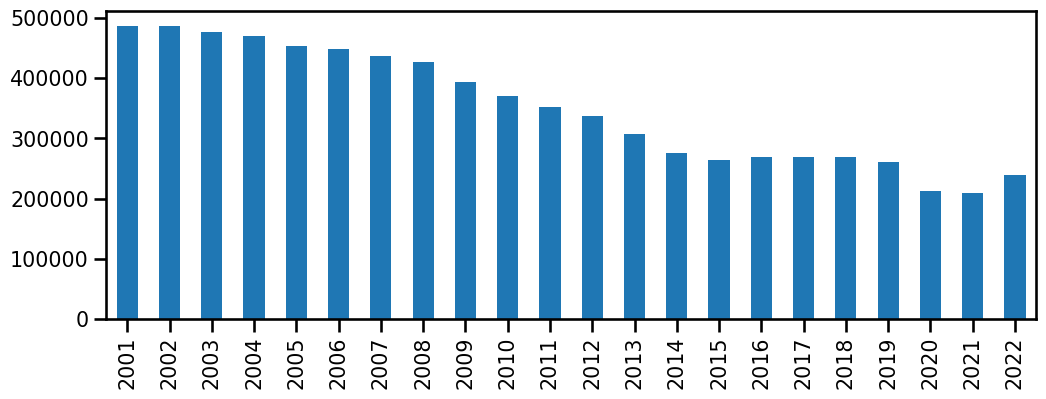

In [12]:
years = df.index.year
years.value_counts().sort_index().plot(kind='bar');


In [13]:
## Inspect the value_counts for the different types of crimes
df['Primary Type'].value_counts()



THEFT                                1626992
BATTERY                              1410889
CRIMINAL DAMAGE                       878914
NARCOTICS                             746155
ASSAULT                               501103
OTHER OFFENSE                         479174
BURGLARY                              422246
MOTOR VEHICLE THEFT                   366586
DECEPTIVE PRACTICE                    340958
ROBBERY                               289677
CRIMINAL TRESPASS                     212869
WEAPONS VIOLATION                     103906
PROSTITUTION                           69750
OFFENSE INVOLVING CHILDREN             55280
PUBLIC PEACE VIOLATION                 52086
SEX OFFENSE                            30442
CRIM SEXUAL ASSAULT                    27584
INTERFERENCE WITH PUBLIC OFFICER       18206
LIQUOR LAW VIOLATION                   14846
GAMBLING                               14616
ARSON                                  13121
HOMICIDE                               12394
KIDNAPPING

In [14]:
# Combine non  - criminal with non-criminal and criminal sexual assault with crim sexual assault

In [15]:
df_temp = df

<Axes: >

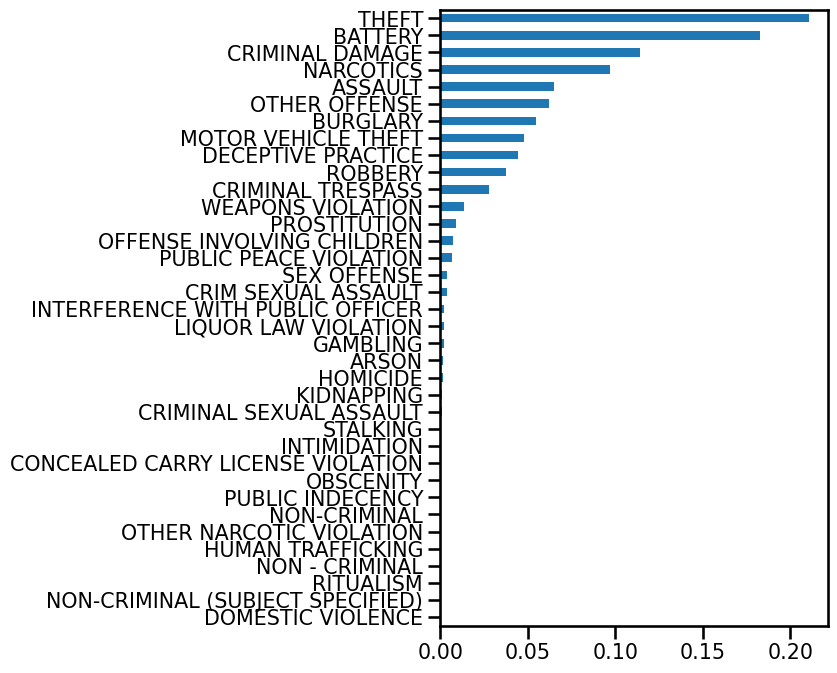

In [16]:
## Inspect the value_counts for the different types of crimes
crime_counts = df_temp['Primary Type'].value_counts(normalize=True)
crime_counts.sort_values().plot(kind='barh',figsize=(5,8))


In [17]:
df_temp.groupby("Primary Type").size()



Primary Type
ARSON                                  13121
ASSAULT                               501103
BATTERY                              1410889
BURGLARY                              422246
CONCEALED CARRY LICENSE VIOLATION       1019
CRIM SEXUAL ASSAULT                    27584
CRIMINAL DAMAGE                       878914
CRIMINAL SEXUAL ASSAULT                 6353
CRIMINAL TRESPASS                     212869
DECEPTIVE PRACTICE                    340958
DOMESTIC VIOLENCE                          1
GAMBLING                               14616
HOMICIDE                               12394
HUMAN TRAFFICKING                         96
INTERFERENCE WITH PUBLIC OFFICER       18206
INTIMIDATION                            4595
KIDNAPPING                              7185
LIQUOR LAW VIOLATION                   14846
MOTOR VEHICLE THEFT                   366586
NARCOTICS                             746155
NON - CRIMINAL                            38
NON-CRIMINAL                             1

In [18]:
## Engineering Features using components of the date/time
df_temp['Year']  = df.index.year
df_temp['Year']


Date
2001-01-01 00:00:00    2001
2001-01-01 00:00:00    2001
2001-01-01 00:00:00    2001
2001-01-01 00:00:00    2001
2001-01-01 00:00:00    2001
                       ... 
2022-12-31 23:47:00    2022
2022-12-31 23:47:00    2022
2022-12-31 23:50:00    2022
2022-12-31 23:50:00    2022
2022-12-31 23:55:00    2022
Name: Year, Length: 7713109, dtype: int64

In [19]:
# II. Resample the temp DataFrame as Yearly data (crime counts)
# and keep ONLY the .size()
df_temp_Y = df_temp.resample("Y").size()
df_temp_Y



Date
2001-12-31    485886
2002-12-31    486807
2003-12-31    475985
2004-12-31    469422
2005-12-31    453773
2006-12-31    448179
2007-12-31    437087
2008-12-31    427183
2009-12-31    392827
2010-12-31    370513
2011-12-31    351993
2012-12-31    336319
2013-12-31    307536
2014-12-31    275789
2015-12-31    264787
2016-12-31    269823
2017-12-31    269100
2018-12-31    268899
2019-12-31    261325
2020-12-31    212194
2021-12-31    208824
2022-12-31    238858
Freq: A-DEC, dtype: int64

In [20]:
# 1. get list of  unique crime descriptions
crime_list = df_temp['Primary Type'].unique()
crime_list



array(['THEFT', 'OFFENSE INVOLVING CHILDREN', 'SEX OFFENSE',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'ASSAULT',
       'CRIM SEXUAL ASSAULT', 'DECEPTIVE PRACTICE', 'OTHER OFFENSE',
       'BATTERY', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'WEAPONS VIOLATION',
       'CRIMINAL TRESPASS', 'ROBBERY', 'NARCOTICS',
       'LIQUOR LAW VIOLATION', 'PUBLIC PEACE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'STALKING', 'HOMICIDE',
       'GAMBLING', 'KIDNAPPING', 'PROSTITUTION', 'INTIMIDATION', 'ARSON',
       'RITUALISM', 'DOMESTIC VIOLENCE', 'OBSCENITY',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY',
       'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'NON - CRIMINAL'], dtype=object)

In [21]:
# 2. Create an empty dictionary  
CRIMES = {}
# 3. Loop through the list of crimes
for crime in crime_list:
    # I. Save a temp df of just the rows that match the crime
   temp = df_temp.loc[ df['Primary Type']==crime].copy()
    # II. Resample the temp DataFrame as Daily data (crime counts) 
    # and keep ONLY the .size() 
   temp_res = temp.resample("Y").size() 
   #III. Save the temporary DataFrame in the dictionary,
   #using the crime description as the key.
   CRIMES[crime] = temp_res.copy() 
CRIMES.keys()



dict_keys(['THEFT', 'OFFENSE INVOLVING CHILDREN', 'SEX OFFENSE', 'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'ASSAULT', 'CRIM SEXUAL ASSAULT', 'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'BATTERY', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'WEAPONS VIOLATION', 'CRIMINAL TRESPASS', 'ROBBERY', 'NARCOTICS', 'LIQUOR LAW VIOLATION', 'PUBLIC PEACE VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER', 'STALKING', 'HOMICIDE', 'GAMBLING', 'KIDNAPPING', 'PROSTITUTION', 'INTIMIDATION', 'ARSON', 'RITUALISM', 'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL', 'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'])

## Topic 2: 
Crimes Across the Years:

Is the total number of crimes increasing or decreasing across the year Overall crime is decreasing with a slight bump in 2022. s?
Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-ve Yes, while many crime types had an increase in numbers around 2022, concealed carry violations, weapons violations, stalking, homicide and human trafficking saw fairly consistent increases over several years.a)?

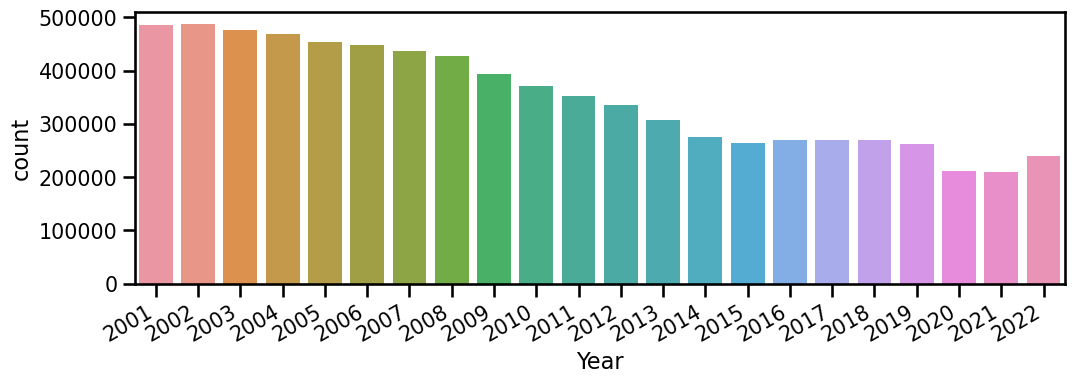

In [22]:
## Visualize years
ax = sns.countplot(data=df_temp_Y, x=df['Year'])
fig = ax.get_figure()
fig.autofmt_xdate()



In [23]:
## Get # of crimes by Year
crimes_by_year = df_temp.groupby('Primary Type')['Year'].value_counts().sort_index()
crimes_by_year



Primary Type       Year
ARSON              2001    1011
                   2002    1032
                   2003     955
                   2004     778
                   2005     691
                           ... 
WEAPONS VIOLATION  2018    5456
                   2019    6339
                   2020    8432
                   2021    8980
                   2022    8766
Name: Year, Length: 689, dtype: int64

In [24]:
## convert to dataframe and reset_index()
plot_df = crimes_by_year.to_frame('# of Crimes').reset_index()
plot_df



Primary Type  Year  # of Crimes
0                ARSON  2001         1011
1                ARSON  2002         1032
2                ARSON  2003          955
3                ARSON  2004          778
4                ARSON  2005          691
..                 ...   ...          ...
684  WEAPONS VIOLATION  2018         5456
685  WEAPONS VIOLATION  2019         6339
686  WEAPONS VIOLATION  2020         8432
687  WEAPONS VIOLATION  2021         8980
688  WEAPONS VIOLATION  2022         8766

[689 rows x 3 columns]

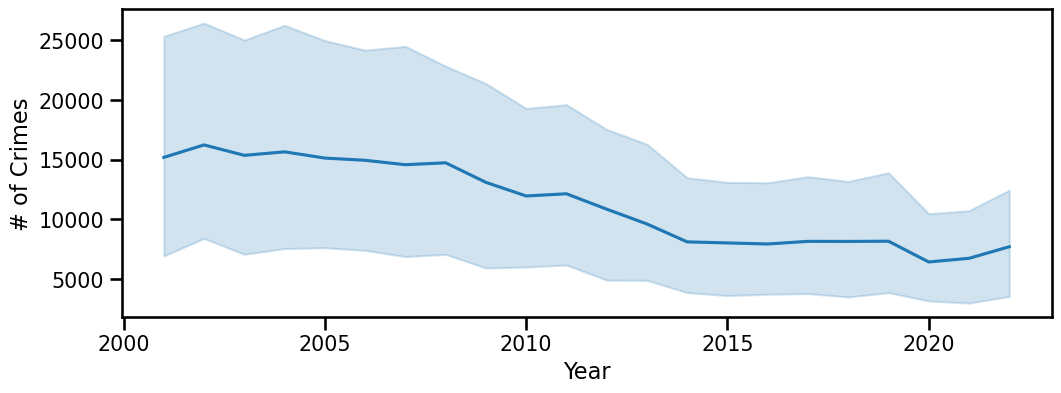

In [25]:
ax = sns.lineplot(data=plot_df, x='Year',y='# of Crimes')



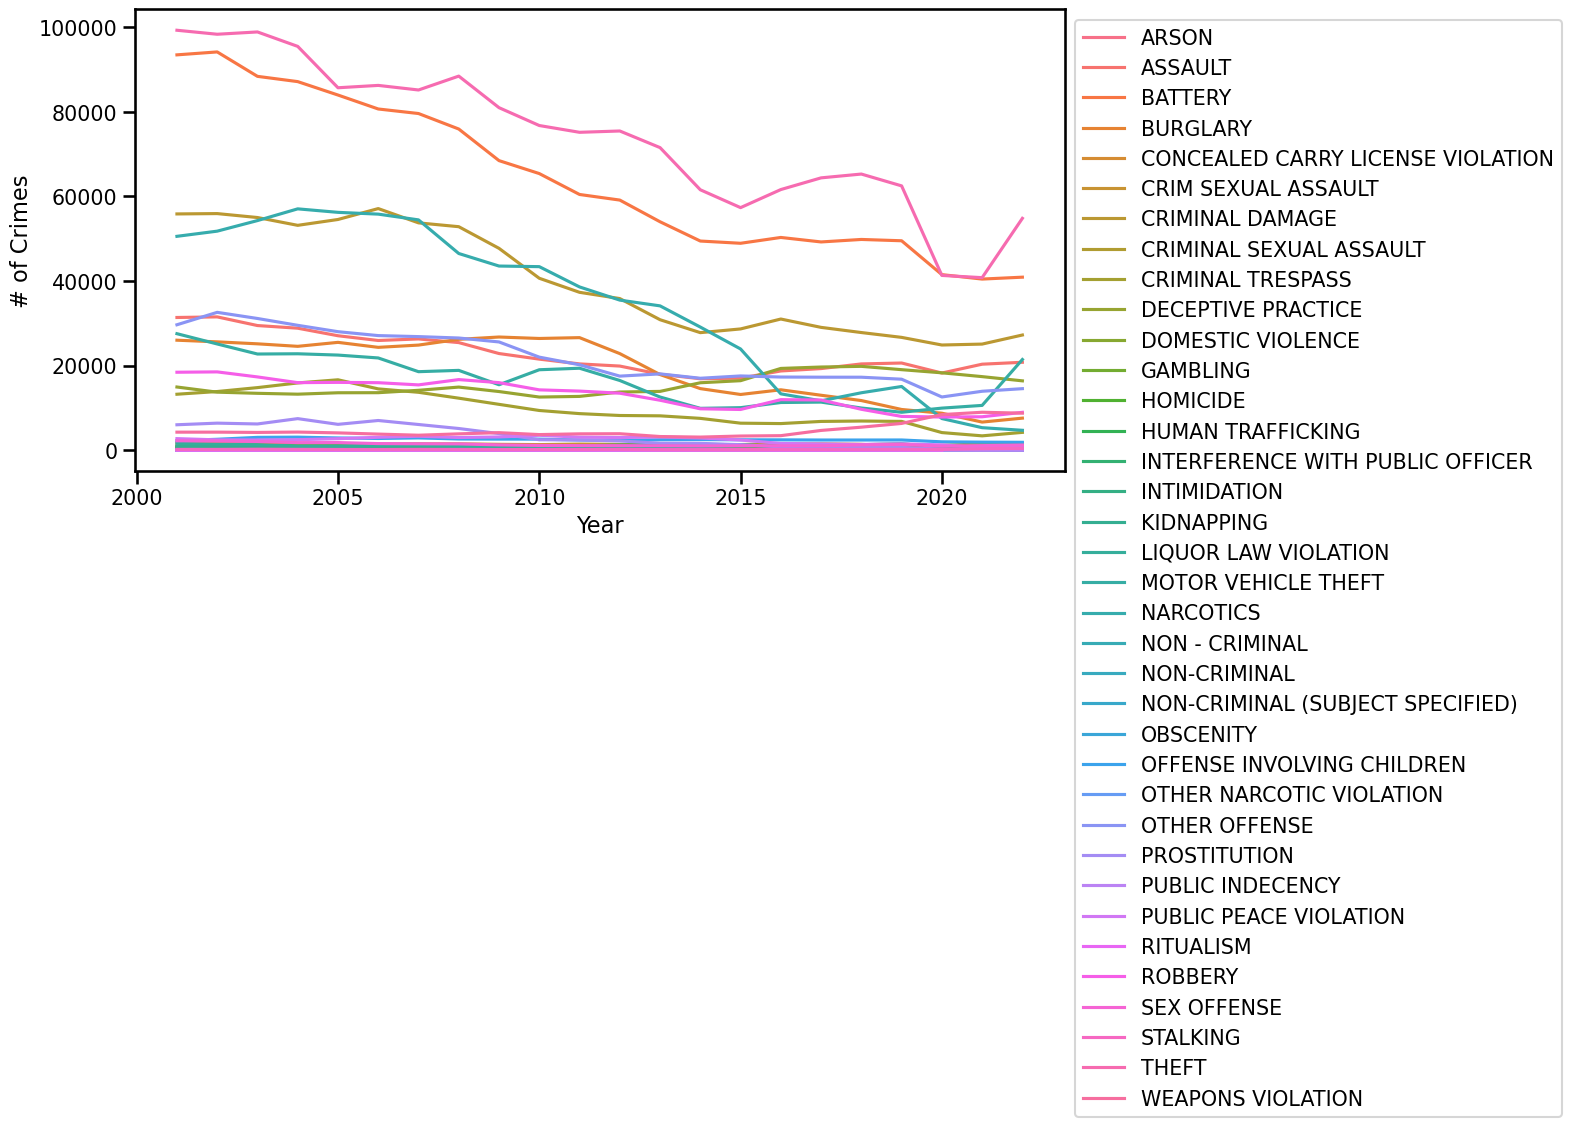

In [26]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=plot_df, x='Year',y='# of Crimes',markers=True,
                  hue='Primary Type',ax=ax,)
ax.legend(bbox_to_anchor=[1,1]);


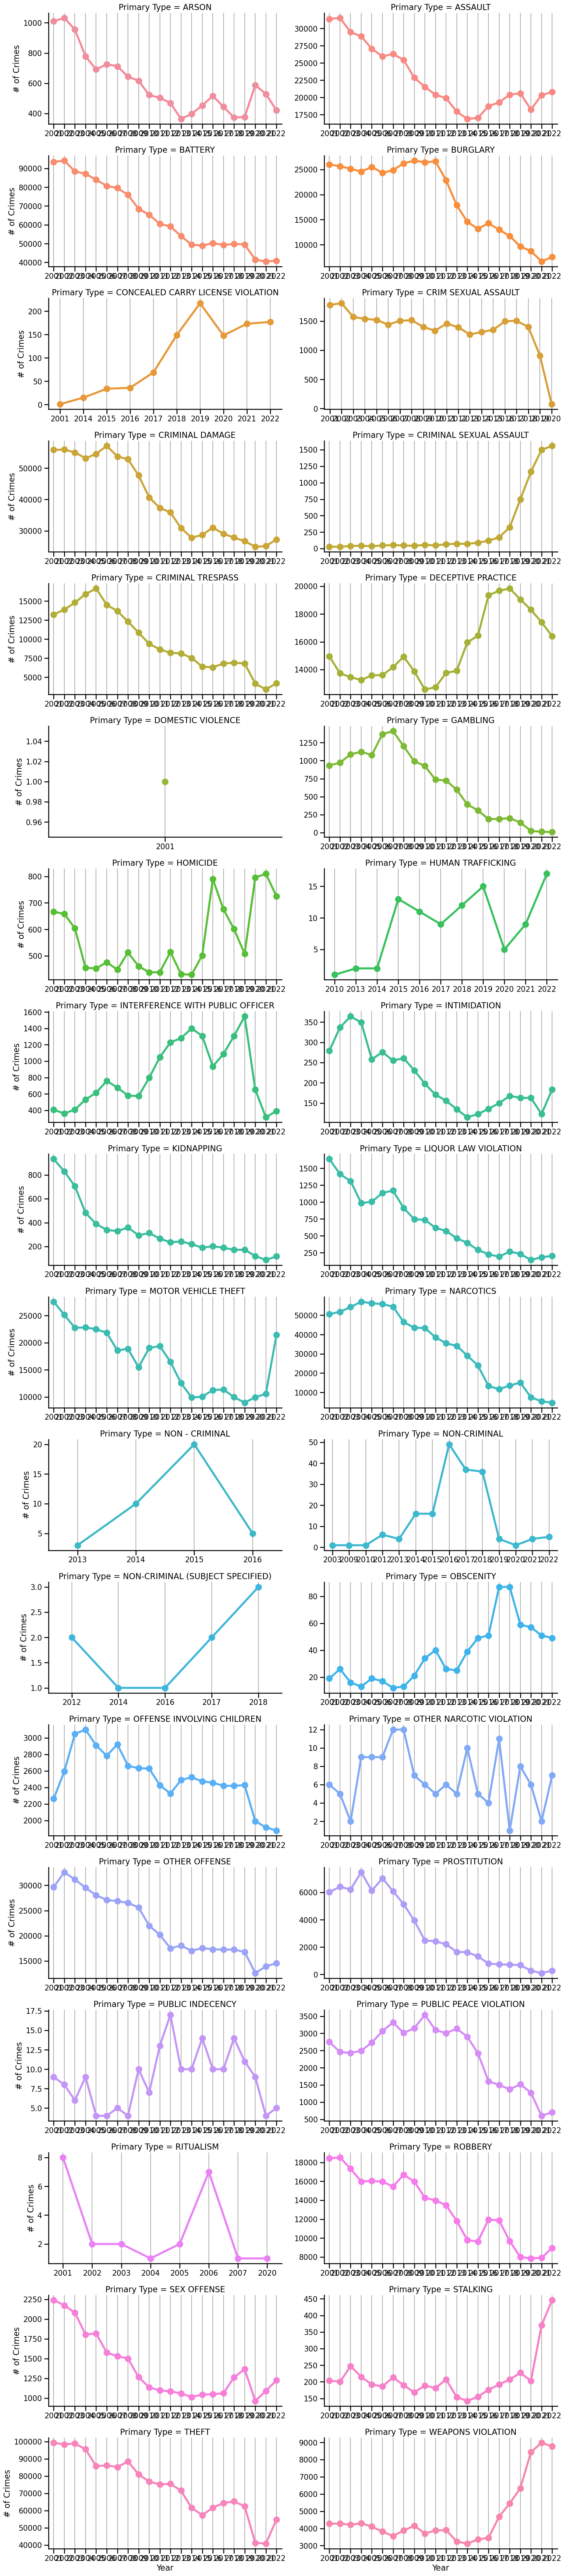

In [27]:
g = sns.catplot(data=plot_df, x='Year', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];



## Topic 4: 
Comparing Months:
Answer the question: ​What months have the most crime? What months have the least The warmer/summer months tend to have the most crime with the colder winter months having the least. July has the most crime, while February has the least.
?
Answer the question: Are there any individual crimes that do not follow this pattern? If so, which crime Narcotics, deceptive practice, motor vehicle theft, and obscenity crimes deviate from the above pattern.s?

In [28]:
df_temp2 = df

In [29]:
df_temp2['Month']  = df.index.month
df_temp2['Month']

Date
2001-01-01 00:00:00     1
2001-01-01 00:00:00     1
2001-01-01 00:00:00     1
2001-01-01 00:00:00     1
2001-01-01 00:00:00     1
                       ..
2022-12-31 23:47:00    12
2022-12-31 23:47:00    12
2022-12-31 23:50:00    12
2022-12-31 23:50:00    12
2022-12-31 23:55:00    12
Name: Month, Length: 7713109, dtype: int64

In [30]:
# II. Resample the temp DataFrame as Monthly data (crime counts)
# and keep ONLY the .size()
df_temp_M = df_temp2.resample("M").size()
df_temp_M

Date
2001-01-31    38119
2001-02-28    33787
2001-03-31    40566
2001-04-30    40091
2001-05-31    41839
              ...  
2022-08-31    22293
2022-09-30    22318
2022-10-31    23195
2022-11-30    20776
2022-12-31    19875
Freq: M, Length: 264, dtype: int64

In [31]:
crimes_by_month = df_temp2.groupby("Month")['Primary Type'].value_counts(normalize=False)
crimes_by_month



Month  Primary Type                    
1      THEFT                               123454
       BATTERY                             101302
       NARCOTICS                            65943
       CRIMINAL DAMAGE                      62574
       OTHER OFFENSE                        42162
                                            ...  
12     OTHER NARCOTIC VIOLATION                 8
       HUMAN TRAFFICKING                        4
       RITUALISM                                3
       NON - CRIMINAL                           1
       NON-CRIMINAL (SUBJECT SPECIFIED)         1
Name: Primary Type, Length: 415, dtype: int64

In [32]:
crimes_by_month_totals = df_temp2.groupby("Month")['Primary Type'].size()
crimes_by_month_totals

Month
1     601236
2     529391
3     629704
4     627175
5     682932
6     681739
7     717232
8     710444
9     668242
10    676285
11    608961
12    579768
Name: Primary Type, dtype: int64

In [33]:
# convert to dataframe and reset_index()
plot_df = crimes_by_month_totals.to_frame('# of Crimes').reset_index()

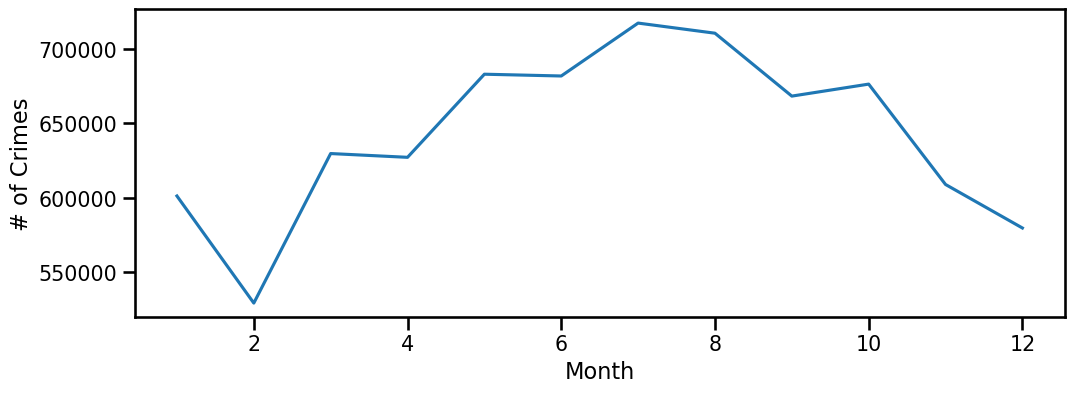

In [34]:
ax = sns.lineplot(data=plot_df, x='Month',y='# of Crimes')

# Sort by Primary Type

In [35]:
# convert to dataframe and reset_index()
plot_df2 = crimes_by_month.to_frame('# of Crimes').reset_index()
plot_df2



Month                      Primary Type  # of Crimes
0        1                             THEFT       123454
1        1                           BATTERY       101302
2        1                         NARCOTICS        65943
3        1                   CRIMINAL DAMAGE        62574
4        1                     OTHER OFFENSE        42162
..     ...                               ...          ...
410     12          OTHER NARCOTIC VIOLATION            8
411     12                 HUMAN TRAFFICKING            4
412     12                         RITUALISM            3
413     12                    NON - CRIMINAL            1
414     12  NON-CRIMINAL (SUBJECT SPECIFIED)            1

[415 rows x 3 columns]

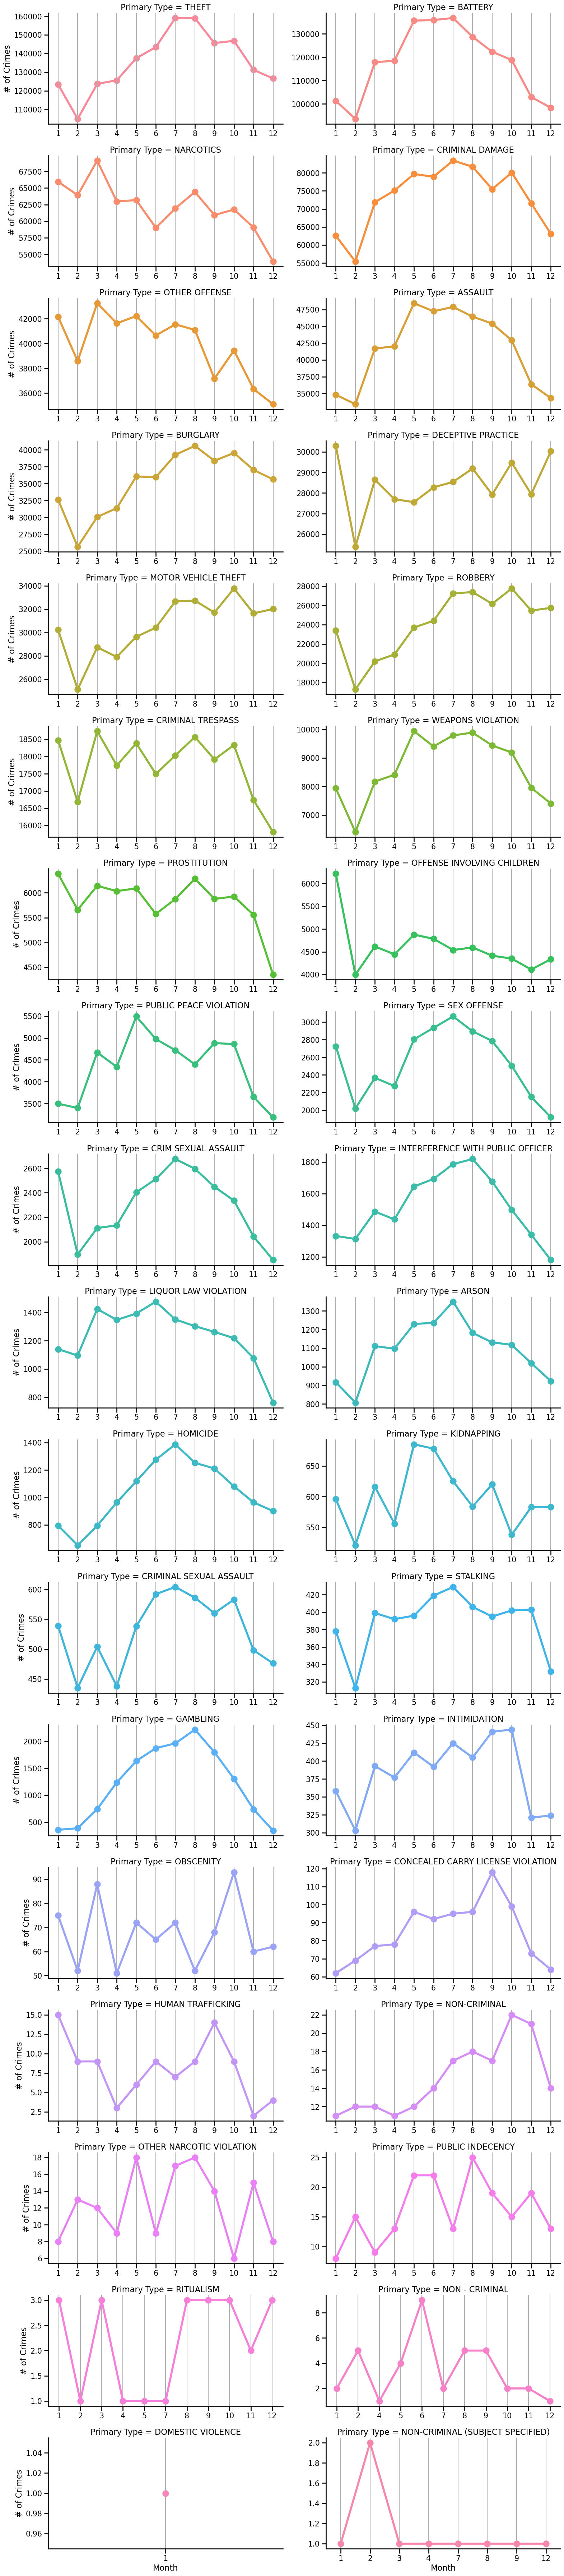

In [36]:
g = sns.catplot(data=plot_df2, x='Month', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];



In [37]:
'''
## loop throught the axes dict
for col, ax in g.axes_dict.items():
    
    ## Extract the idx min and idxmax from the val counts
    min_, max_ = crimes_by_month.loc[col].agg(['idxmin','idxmax'])
    
    ## add vlines for both and SAVE THE LINE and a label to use in legend
    ln1 = ax.axvline(min_, color='darkgreen',ls='--')
    lab1 = f'Min(Month={min_})'
    
    ln2 = ax.axvline(max_,color='darkred',ls='--')
    lab2 = f'Max(Month={max_})'
    
    ## manually add legend using list of ln1 and ln2 and a list of labels
    ax.legend( [ln1,ln2], [lab1,lab2] )
    ## add x grid
    ax.grid(axis='x')
    
g.fig
'''


"\n## loop throught the axes dict\nfor col, ax in g.axes_dict.items():\n    \n    ## Extract the idx min and idxmax from the val counts\n    min_, max_ = crimes_by_month.loc[col].agg(['idxmin','idxmax'])\n    \n    ## add vlines for both and SAVE THE LINE and a label to use in legend\n    ln1 = ax.axvline(min_, color='darkgreen',ls='--')\n    lab1 = f'Min(Month={min_})'\n    \n    ln2 = ax.axvline(max_,color='darkred',ls='--')\n    lab2 = f'Max(Month={max_})'\n    \n    ## manually add legend using list of ln1 and ln2 and a list of labels\n    ax.legend( [ln1,ln2], [lab1,lab2] )\n    ## add x grid\n    ax.grid(axis='x')\n    \ng.fig\n"

## Topic 5:
Comparing Holidays:
Answer the question: ​What are the top 3 holidays with the largest number of crimes?
Answer the question:  For each of the top 3 holidays with the most crime, what are the top 5 most common crimes on that holiday?

In [66]:
## making a date range that covers full dataset
all_days = pd.date_range(df_reg_index["Date"].min(), df_reg_index["Date"].max())
all_days



DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=8035, freq='D')

In [67]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays



holidays.country_holidays('US')

In [68]:
## Testing first date
print(all_days[0])
us_holidays.get(all_days[0])



2001-01-01 00:00:00


"New Year's Day"

In [69]:
## Getting us holidays for all dates
holiday_list = [us_holidays.get(day) for day in all_days]



In [70]:
holiday_crimes = df_reg_index.groupby('US Holiday')['Primary Type'].value_counts()
holiday_crimes = holiday_crimes.to_frame('# of Crimes')
holiday_crimes


# of Crimes
US Holiday            Primary Type                                  
Christmas Day         BATTERY                                   3431
                      THEFT                                     1869
                      CRIMINAL DAMAGE                           1743
                      ASSAULT                                    883
                      OTHER OFFENSE                              854
...                                                              ...
Washington's Birthday GAMBLING                                    12
                      KIDNAPPING                                  11
                      INTIMIDATION                                10
                      STALKING                                     9
                      CONCEALED CARRY LICENSE VIOLATION            4

[443 rows x 1 columns]

In [105]:
pd.set_option('display.max_rows',None)

MultiIndex([(        'Christmas Day',                             'ARSON'),
            (        'Christmas Day',                           'ASSAULT'),
            (        'Christmas Day',                           'BATTERY'),
            (        'Christmas Day',                          'BURGLARY'),
            (        'Christmas Day', 'CONCEALED CARRY LICENSE VIOLATION'),
            (        'Christmas Day',               'CRIM SEXUAL ASSAULT'),
            (        'Christmas Day',                   'CRIMINAL DAMAGE'),
            (        'Christmas Day',           'CRIMINAL SEXUAL ASSAULT'),
            (        'Christmas Day',                 'CRIMINAL TRESPASS'),
            (        'Christmas Day',                'DECEPTIVE PRACTICE'),
            ...
            ('Washington's Birthday',                         'NARCOTICS'),
            ('Washington's Birthday',        'OFFENSE INVOLVING CHILDREN'),
            ('Washington's Birthday',                     'OTHER OFFENSE

In [114]:
holiday_crimes.sort_values().sum()

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

In [78]:
ax = sns.barplot(data=holiday_crimes, x = 'US Holiday', estimator=np.sum)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right');
#Could not get this to work


ValueError: Could not interpret input 'US Holiday'

# Breakdown of Holidays with the most Crime

In [80]:
holiday_crimes = df_reg_index.groupby('US Holiday')['Primary Type'].value_counts()
holiday_crimes = holiday_crimes.to_frame('# of Crimes')
holiday_crimes



# of Crimes
US Holiday            Primary Type                                  
Christmas Day         BATTERY                                   3431
                      THEFT                                     1869
                      CRIMINAL DAMAGE                           1743
                      ASSAULT                                    883
                      OTHER OFFENSE                              854
...                                                              ...
Washington's Birthday GAMBLING                                    12
                      KIDNAPPING                                  11
                      INTIMIDATION                                10
                      STALKING                                     9
                      CONCEALED CARRY LICENSE VIOLATION            4

[443 rows x 1 columns]

In [81]:
holiday_crimes.loc["New Year's Day"]



# of Crimes
Primary Type                                  
THEFT                                     6845
BATTERY                                   6043
CRIMINAL DAMAGE                           3236
DECEPTIVE PRACTICE                        2934
OFFENSE INVOLVING CHILDREN                2380
OTHER OFFENSE                             2380
NARCOTICS                                 1498
ASSAULT                                   1216
MOTOR VEHICLE THEFT                        994
SEX OFFENSE                                900
BURGLARY                                   837
WEAPONS VIOLATION                          831
ROBBERY                                    765
CRIM SEXUAL ASSAULT                        755
CRIMINAL TRESPASS                          469
CRIMINAL SEXUAL ASSAULT                    206
PUBLIC PEACE VIOLATION                     114
PROSTITUTION                                60
INTERFERENCE WITH PUBLIC OFFICER            56
LIQUOR LAW VIOLATION                        56
HOMICIDE                                    32
ARSON                                       30
KIDNAPPING                                  25
STALKING                                    21
OBSCENITY                                   15
INTIMIDATION                                11
GAMBLING                                     8
CONCEALED CARRY LICENSE VIOLATION            4
HUMAN TRAFFICKING                            4

In [82]:
holiday_crimes.loc["New Year's Day (Observed)"]



# of Crimes
Primary Type                                  
THEFT                                      929
BATTERY                                    843
CRIMINAL DAMAGE                            687
NARCOTICS                                  419
OTHER OFFENSE                              318
BURGLARY                                   298
ASSAULT                                    289
MOTOR VEHICLE THEFT                        255
ROBBERY                                    245
DECEPTIVE PRACTICE                         220
CRIMINAL TRESPASS                          115
WEAPONS VIOLATION                          102
OFFENSE INVOLVING CHILDREN                  30
CRIM SEXUAL ASSAULT                         22
PUBLIC PEACE VIOLATION                      20
SEX OFFENSE                                 18
PROSTITUTION                                16
INTERFERENCE WITH PUBLIC OFFICER            12
ARSON                                        8
LIQUOR LAW VIOLATION                         8
HOMICIDE                                     6
KIDNAPPING                                   6
STALKING                                     6
INTIMIDATION                                 2
CONCEALED CARRY LICENSE VIOLATION            1
CRIMINAL SEXUAL ASSAULT                      1
GAMBLING                                     1

In [84]:
temp = pd.concat([holiday_crimes.loc["New Year's Day"],
                  holiday_crimes.loc["New Year's Day (Observed)"]],
                 axis=1)
temp



# of Crimes  # of Crimes
Primary Type                                               
THEFT                                     6845        929.0
BATTERY                                   6043        843.0
CRIMINAL DAMAGE                           3236        687.0
DECEPTIVE PRACTICE                        2934        220.0
OFFENSE INVOLVING CHILDREN                2380         30.0
OTHER OFFENSE                             2380        318.0
NARCOTICS                                 1498        419.0
ASSAULT                                   1216        289.0
MOTOR VEHICLE THEFT                        994        255.0
SEX OFFENSE                                900         18.0
BURGLARY                                   837        298.0
WEAPONS VIOLATION                          831        102.0
ROBBERY                                    765        245.0
CRIM SEXUAL ASSAULT                        755         22.0
CRIMINAL TRESPASS                          469        115.0
CRIMINAL SEXUAL ASSAULT                    206          1.0
PUBLIC PEACE VIOLATION                     114         20.0
PROSTITUTION                                60         16.0
INTERFERENCE WITH PUBLIC OFFICER            56         12.0
LIQUOR LAW VIOLATION                        56          8.0
HOMICIDE                                    32          6.0
ARSON                                       30          8.0
KIDNAPPING                                  25          6.0
STALKING                                    21          6.0
OBSCENITY                                   15          NaN
INTIMIDATION                                11          2.0
GAMBLING                                     8          1.0
CONCEALED CARRY LICENSE VIOLATION            4          1.0
HUMAN TRAFFICKING                            4          NaN

In [85]:
## get the .sum ACROSS columns (use axis=1)
new_years_sum = temp.sum(axis=1)
new_years_sum



Primary Type
THEFT                                7774.0
BATTERY                              6886.0
CRIMINAL DAMAGE                      3923.0
DECEPTIVE PRACTICE                   3154.0
OFFENSE INVOLVING CHILDREN           2410.0
OTHER OFFENSE                        2698.0
NARCOTICS                            1917.0
ASSAULT                              1505.0
MOTOR VEHICLE THEFT                  1249.0
SEX OFFENSE                           918.0
BURGLARY                             1135.0
WEAPONS VIOLATION                     933.0
ROBBERY                              1010.0
CRIM SEXUAL ASSAULT                   777.0
CRIMINAL TRESPASS                     584.0
CRIMINAL SEXUAL ASSAULT               207.0
PUBLIC PEACE VIOLATION                134.0
PROSTITUTION                           76.0
INTERFERENCE WITH PUBLIC OFFICER       68.0
LIQUOR LAW VIOLATION                   64.0
HOMICIDE                               38.0
ARSON                                  38.0
KIDNAPPING         

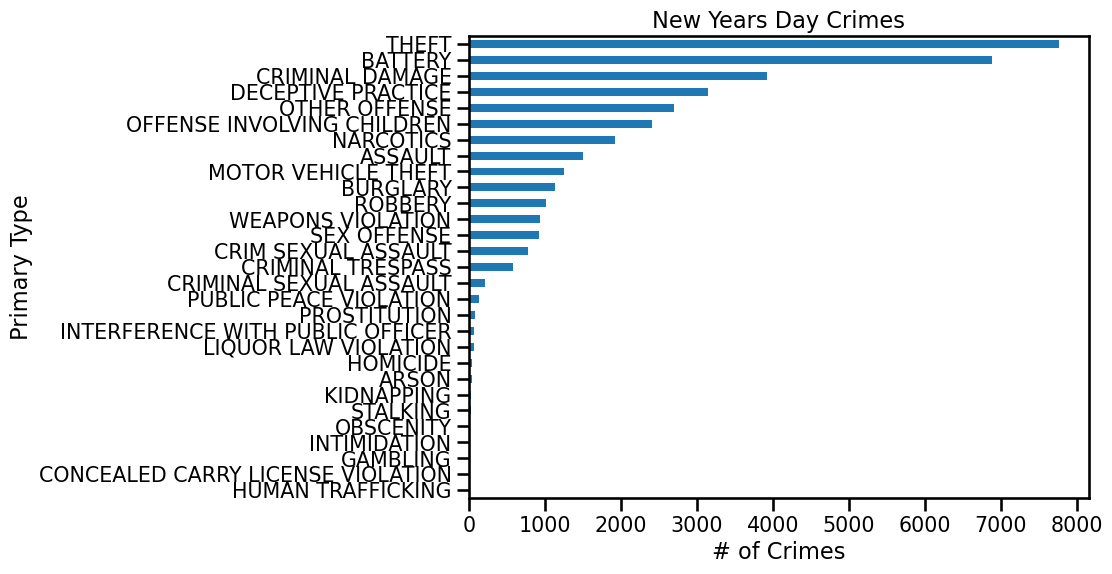

In [86]:
ax = new_years_sum.sort_values().plot(kind='barh',figsize=(8,6))
ax.set(title="New Years Day Crimes", xlabel='# of Crimes');



## Christmas

In [89]:
holiday_crimes.loc["Christmas Day"]

# of Crimes
Primary Type                                  
BATTERY                                   3431
THEFT                                     1869
CRIMINAL DAMAGE                           1743
ASSAULT                                    883
OTHER OFFENSE                              854
BURGLARY                                   841
MOTOR VEHICLE THEFT                        725
ROBBERY                                    519
NARCOTICS                                  429
DECEPTIVE PRACTICE                         285
CRIMINAL TRESPASS                          219
OFFENSE INVOLVING CHILDREN                 192
WEAPONS VIOLATION                          104
SEX OFFENSE                                 50
CRIM SEXUAL ASSAULT                         46
PUBLIC PEACE VIOLATION                      43
KIDNAPPING                                  36
HOMICIDE                                    35
ARSON                                       27
PROSTITUTION                                27
INTERFERENCE WITH PUBLIC OFFICER            24
CRIMINAL SEXUAL ASSAULT                     16
INTIMIDATION                                 7
STALKING                                     5
LIQUOR LAW VIOLATION                         3
CONCEALED CARRY LICENSE VIOLATION            2
GAMBLING                                     1
NON-CRIMINAL                                 1
OBSCENITY                                    1

In [90]:
holiday_crimes.loc["Christmas Day (Observed)"]

# of Crimes
Primary Type                                 
THEFT                                    1013
BATTERY                                   886
CRIMINAL DAMAGE                           593
NARCOTICS                                 390
BURGLARY                                  360
MOTOR VEHICLE THEFT                       330
ASSAULT                                   301
OTHER OFFENSE                             278
ROBBERY                                   244
DECEPTIVE PRACTICE                        213
CRIMINAL TRESPASS                         119
WEAPONS VIOLATION                          51
OFFENSE INVOLVING CHILDREN                 39
PUBLIC PEACE VIOLATION                     21
CRIM SEXUAL ASSAULT                        18
PROSTITUTION                               16
SEX OFFENSE                                13
INTERFERENCE WITH PUBLIC OFFICER            7
LIQUOR LAW VIOLATION                        7
ARSON                                       6
HOMICIDE                                    6
CRIMINAL SEXUAL ASSAULT                     5
STALKING                                    4
GAMBLING                                    3
KIDNAPPING                                  3
INTIMIDATION                                2
OBSCENITY                                   1

In [91]:
temp = pd.concat([holiday_crimes.loc["Christmas Day"],
                  holiday_crimes.loc["Christmas Day (Observed)"]],
                 axis=1)
temp



# of Crimes  # of Crimes
Primary Type                                               
BATTERY                                   3431        886.0
THEFT                                     1869       1013.0
CRIMINAL DAMAGE                           1743        593.0
ASSAULT                                    883        301.0
OTHER OFFENSE                              854        278.0
BURGLARY                                   841        360.0
MOTOR VEHICLE THEFT                        725        330.0
ROBBERY                                    519        244.0
NARCOTICS                                  429        390.0
DECEPTIVE PRACTICE                         285        213.0
CRIMINAL TRESPASS                          219        119.0
OFFENSE INVOLVING CHILDREN                 192         39.0
WEAPONS VIOLATION                          104         51.0
SEX OFFENSE                                 50         13.0
CRIM SEXUAL ASSAULT                         46         18.0
PUBLIC PEACE VIOLATION                      43         21.0
KIDNAPPING                                  36          3.0
HOMICIDE                                    35          6.0
ARSON                                       27          6.0
PROSTITUTION                                27         16.0
INTERFERENCE WITH PUBLIC OFFICER            24          7.0
CRIMINAL SEXUAL ASSAULT                     16          5.0
INTIMIDATION                                 7          2.0
STALKING                                     5          4.0
LIQUOR LAW VIOLATION                         3          7.0
CONCEALED CARRY LICENSE VIOLATION            2          NaN
GAMBLING                                     1          3.0
NON-CRIMINAL                                 1          NaN
OBSCENITY                                    1          1.0

In [92]:
## get the .sum ACROSS columns (use axis=1)
christmas_sum = temp.sum(axis=1)
christmas_sum


Primary Type
BATTERY                              4317.0
THEFT                                2882.0
CRIMINAL DAMAGE                      2336.0
ASSAULT                              1184.0
OTHER OFFENSE                        1132.0
BURGLARY                             1201.0
MOTOR VEHICLE THEFT                  1055.0
ROBBERY                               763.0
NARCOTICS                             819.0
DECEPTIVE PRACTICE                    498.0
CRIMINAL TRESPASS                     338.0
OFFENSE INVOLVING CHILDREN            231.0
WEAPONS VIOLATION                     155.0
SEX OFFENSE                            63.0
CRIM SEXUAL ASSAULT                    64.0
PUBLIC PEACE VIOLATION                 64.0
KIDNAPPING                             39.0
HOMICIDE                               41.0
ARSON                                  33.0
PROSTITUTION                           43.0
INTERFERENCE WITH PUBLIC OFFICER       31.0
CRIMINAL SEXUAL ASSAULT                21.0
INTIMIDATION       

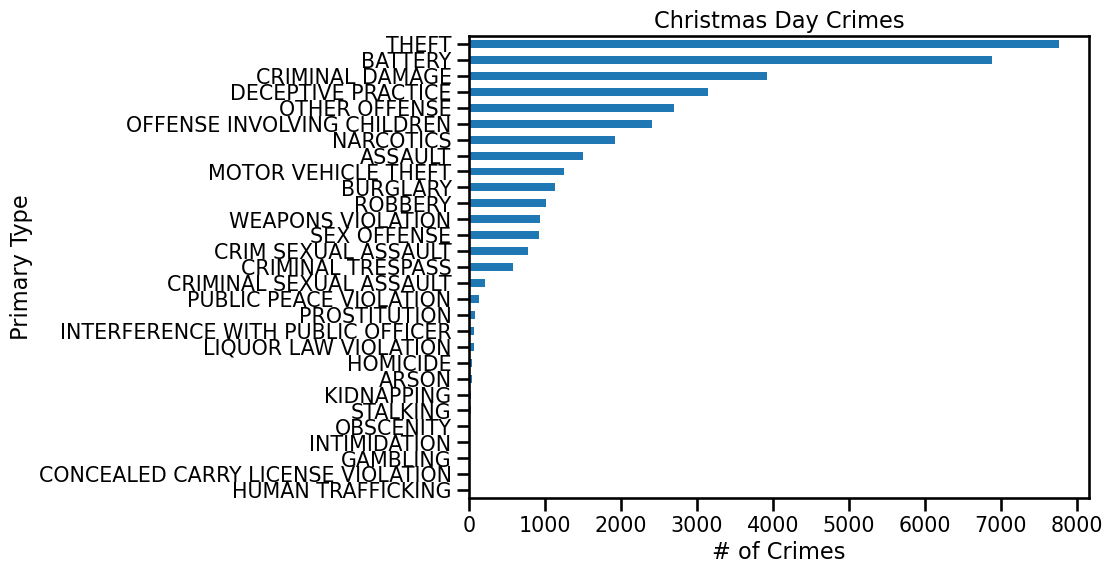

In [93]:
ax = new_years_sum.sort_values().plot(kind='barh',figsize=(8,6))
ax.set(title="Christmas Day Crimes", xlabel='# of Crimes');
